#Εθνικό Μετσόβιο Πολυτεχνείο
Εργαστήριο Τεχνολογίας και Ανάλυσης Εικόνων και Βίντεο

3η Ομαδική Άσκηση

Ομάδα 12

Βικέντιος Βιτάλης el18803 & Οδυσσέας Μοσχίδης el15110

## 1.Θεωρητικό μέρος

### Ζήτημα β1: Ποια είναι η διαφορά του bounding box και του anchor box στο YOLO; (Εξηγήστε συνοπτικά)

1. Ένα bounding box αποτελεί την περιοχή ενδιαφέροντος του υποψήφιου αντικειμένου. Ο αλγόριθμος YOLO (You Only Look Once) έχει ως στόχο να προβλέψει bounding boxes κάθε αντικειμένου μαζί με την πιθανότητα της κλάσης στην οποία ανήκει το αντικείμενο. Το μοντέλο χωρίζει κάθε εικόνα η οποία εισάγεται σε ένα πλέγμα SxS κελιών. Κάθε κελί προβλέπει B bounding boxes και C πιθανότητες κλάσης των αντικειμένων που πέφτουν στο κέντρο των κελιών του πλέγματος. Κάθε bounding box μπορεί να ειδικεύεται στην εύρεση ενός συγκεκριμένου είδους αντικειμένου. Tα bounding boxes Β είναι συνδεδεμένα με έναν αριθμό anchors που χρησιμοποιούνται. Κάθε bounding box έχει 5 + C γνωρίσματα. Τα 5 γνωρίσματα αποτελόυνται από: Συντεταγμένες κέντρου (bx, by), ύψος (bh), πλάτος (bw) και πιθανότητα επιτυχίας (pc). C είναι ο αριθμός των κλάσεων 
2. Στην ανίχνευση αντικειμένων προέκυψε πρόβλημα όταν τα αντικείμενα προς εύρεση δεν ήταν τετράγωνου σχήματος. Αυτά τα αντικείμενα μπορούσαν να είναι οποιουδήποτε τύπου, κυρίως ορθογώνιου τύπου. Τότε ήταν η στιγμή που άρχισαν να χρησιμοποιούνται τα anchor boxes. Τα anchor boxes είναι προσχεδιασμένα κουτιά που έχουν ένα σύνολο αναλογίας διαστάσεων. Οι αναλογίες διαστάσεων είναι ορισμένες πριν την εκμάθηση με την εκτέλεση K-means clustering σε όλο τό σύνολο των δεδομένων. K-means clustering στην ουσία αποτελεί την εύρεση του μέσου όρου των δεδομένων, δηλαδή του κεντροειδούς, στο αντίστοιχο σύμπλεγμα. Τα anchor boxes "αγκυροβολούν" στα κελιά του συμπλέγματος και μοιράζονται το ίδιο κεντροειδές. 

### Ζήτημα β2: Ποιες θα είναι οι διαστάσεις του πίνακα εξόδου (πρόβλεψης) y_hat του αλγορίθμου YOLO θεωρώντας ότι έχουμε δυο anchor boxes και 3 κλάσεις; Αναφέρετε επίσης το ρόλο για κάθε στοιχείο του πίνακα αυτού.


Στην περίπτωση που εκτελέσουμε τον YOLO αλγόριθμο θεωρώντας ότι έχουμε δυο anchor boxes και 3 κλάσεις, τότε ο πίνακας εξόδου θα διαμορφωθεί ως εξής: Αρχικά θα έχουμε 3 κλάσεις, άρα c1, c2, c3. Έπειτα, κάθε anchor box θα αποτελείται από συντεταγμένες κέντρου (bx, by), ύψους (bh), πλάτους (bw) και πιθανότητα επιτυχίας (pc). Όμως έχουμε 2 anchor boxes, άρα ο πίνακας εξόδου θα έχει τη μορφή:


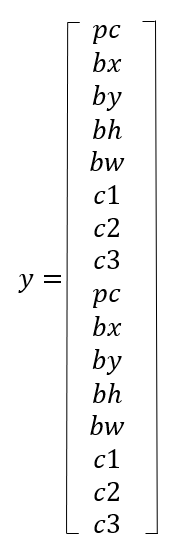 


### Ζήτημα β3: Εξηγήστε συνοπτικά την έννοια της μεθόδου Non-Max suppression. Σε τι χρησιμεύει;

Υπάρχει πιθανότητα μετά από ένα πέρασμα της εικόνας εισόδου, η έξοδος να έχει πολλαπλά bounding boxes για το ίδιο αντικείμενο αφού το κεντροειδές είναι το ίδιο. Όμως χρειαζόμαστε ένα και το πιο κατάλληλο bounding box. Για αυτό το πρόβλημα μας είναι χρήσιμη η μέθοδος Non-Maximum Suppression. Πρακτικά φιλτράρει τα πολλαπλά bounding boxes. Μπορούμε να ορίσουμε ένα συγκεκριμένο κατώφλι το οποίο δρα σαν περιορισμός για την NMS μέθοδο. Το κατώφλι αυτό αγνοεί τα υπόλοιπα bounding boxes των οποίων η πιθανότητα επιτυχίας είναι μικρότερη της τιμής του κατωφλιού μας. Έτσι, φιλτράρονται τα bounding boxes, χωρίς όμως να έχει γίνει ολοκληρωτικό φιλτράρισμα. Εν συνεχεία, η μέθοδος ταξινομεί σε φθίνουσα σειρά τα bounding boxes και διαλέγει εκείνο με την υψηλότερη πιθανότητα επιτυχίας ως το πιο κατάλληλο για το αντικείμενο. Τέλος, βρίσκουμε όλα τα υπόλοιπα κουτιά με μεγάλο σημείο τομής με το κουτί με την μεγαλύτερη πιθανότητα επιτυχίας και διαγράφουμε κι αυτά. Έτσι, μέσω της μεθόδου αυτής εξάγεται το πιο κατάλληλο κουτί. 

### Ζήτημα β4: Στον αλγόριθμο SORT το ταίριασμα (matching) των αντικειμένων με ποια μέθοδο γίνεται; Αναφέρετε ένα παράδειγμα μετρικής για το bounding boxes distance.

Στο τρίτο βήμα του αλγορίθμου SORT γίνεται matching των διάφορων αντικειμένων της εικόνας με τον Hungarian αλγόριθμο. Υπολογίζει το ελάχιστο κόστος της IoU απόστασης μεταξύ κάθε ανίχνευσης κι όλων των bounding boxes. Ένα παράδειγμα μετρικής της απόστασης των bounding boxes αποτελεί η παρακάτω εικόνα. Συγκρίνουμε το κόστος IoU του αριστερού κίτρινου bounding box με τα τρία κόκκινα bounding boxes (detections). Μεγαλύτερο IoU έχει το αριστερό κόκκινο bounding box. Τα άλλα δύο IoU είναι μηδενικά αφού η τομή τους με το αριστερό κίτρινο κουτί (prediction) είναι μηδενική. 


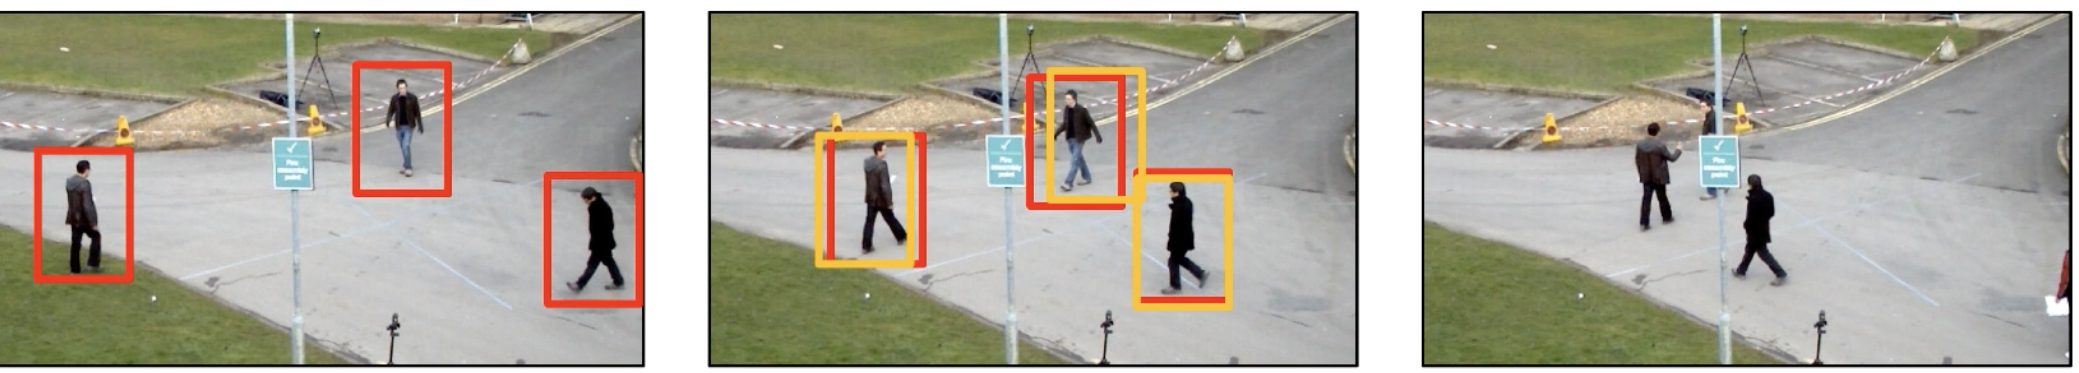

### Ζήτημα β5: Πώς ορίζεται η μέθοδος του tracking-by-detection και σε ποιο component αυτής της μεθόδου χρησιμοποιείται βαθιά μάθηση (deep learning);

Η κεντρική ιδέα της μεθόδου tracking-by-detection είναι η εξής: Όταν υφίσταται ένα σύνολο ανιχνεύσεων για ένα πλήθος στιγμιοτύπων ενός βίντεο, τα οποία είναι ανεξάρτητα μεταξύ τους, το πρόβλημα είναι να βρεθούν οι αντιστοιχίες των ανιχνεύσεων με τα στιγμιότυπα και να υπολογιστεί η τροχιά τους. Αποτελεί μια κοινή προσέγγιση σε προβλήματα multi-object tracking. Object-tracking προβλήματα αποτελούν μια εφαρμογή βαθιάς μάθησης όπου το πρόγραμμα λαμβάνει ένα αρχικό σύνολο ανιχνεύσεων και αναπτύσσει μια μοναδική ταυτοποίηση για κάθε αρχική ανίχνευση. Εν συνεχεία, εντοπίζει τα ανιχνευμένα αντικείμενα όσο διαγράφουν την τροχιά τους στα στιγμιότυπα ενός βίντεο. 

Συγκεκριμένα τα βήματα που πραγματοποιούνται κατά την μέθοδο Multi-Object Tracking κάνοντας χρήση του SORT αλγόριθμου είναι τα εξής:
- Τα αντίκειμενα του frame εντοπίζονται και καθορίζονται τα bounding boxes αυτών.
- Για το frame t + 1 αν εντοπίσαμε για αρκετό χρόνικό διάστημα τα συγκεκριμένα αντικείμενα χρησιμοποιούμε το motion model (Kalman filter) για να εξάγουμε τα predictions. Δηλαδή το πόσο κουνήθηκαν τα bounding boxes σε σχεση με το frame t, υποθέτοντας ότι η κίνηση θα είναι παρόμοια με τις προηγούμενες χρονικές στιγμές. 

## 2.Αλλαγή υπερπαραμέτρων του αλγορίθμου

In [ ]:
import sys
!{sys.executable} -m pip install torch==1.5.0 torchvision==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install filterpy==1.4.5
!{sys.executable} -m pip install scikit-image==0.17.2
!{sys.executable} -m pip install lap==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount to google drive.
Το κάνουμε αυτό για έχουμε πρόσβαση στα python modules που χρειαζόμαστε.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Για να μπορέσετε να έχετε πρόσβαση σε όλα τα αρχεία του φακέλου Lab_motion_tracking_exercise θα πρέπει πριν τρέξετε το παρακάτω κελί να πατε στο drive του εργαστηρίου, να κάνετε δεξί κλικ στο Lab_motion_tracking_exercise, να πατήσετε Add a shortcut to drive και μετά να πατήσετε My Drive.

In [ ]:
import sys
import os 
sys.path.insert(0,'/content/drive/My Drive/Lab_motion_tracking_exercise') 
print(os.listdir('/content/drive/My Drive/Lab_motion_tracking_exercise')) # Έλεγχος ότι έχουμε όλα τα απαραίτητα αρχεία

['models.py', 'road_trafifc.mp4', 'sort.py', '12.mp4', 'utils', 'images', '__pycache__', 'config', 'Object_Detection_and_Tracking.ipynb']


Φορτώνουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
from models import *
from utils import *

import os, sys, time, datetime, random
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
import os
print(os.getcwd())

/content


COCO dataset sample and annotation format


## Σημείο κώδικα όπου γίνεται η αλλαγή υπερπαραμέτρων

In [ ]:
config_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.cfg'
weights_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.weights' # Φορτώνουμε τα προ-εκπαιδευμένα στο COCO dataset βάρη του μοντέλου YOLOv3
class_path='./drive/My Drive/Lab_motion_tracking_exercise/config/coco.names'  #  Φορτώνουμε τις μονο τις κλάσεις που θέλουμε να κάνουμε detection (ανθρώπους, αυτοκίνητα κλπ) 

img_size=416    
conf_thres=0.8 # Εδώ αλλάζουμε τις μεταβλητές των υπερπαραμέτρων
nms_thres=0.9 # NMS threshold

# Load model and weights
model = Darknet(config_path, img_size=img_size)
model.load_weights(weights_path)
model.cuda()
model.eval()
classes = utils.load_classes(class_path)
Tensor = torch.cuda.FloatTensor

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def detect_image(img):
    # scale and pad image
    ratio = min(img_size/img.size[0], img_size/img.size[1])
    imw = round(img.size[0] * ratio)
    imh = round(img.size[1] * ratio)
    img_transforms = transforms.Compose([ transforms.Resize((imh, imw)),
         transforms.Pad((max(int((imh-imw)/2),0), max(int((imw-imh)/2),0), max(int((imh-imw)/2),0), max(int((imw-imh)/2),0)),
                        (128,128,128)),
         transforms.ToTensor(),
         ])
    # convert image to Tensor
    image_tensor = img_transforms(img).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input_img = Variable(image_tensor.type(Tensor))
    # run inference on the model and get detections
    with torch.no_grad():
        detections = model(input_img)
        detections = utils.non_max_suppression(detections, 80, conf_thres, nms_thres)
    return detections[0]

Inference Time: 0:00:00.207878


<Figure size 432x288 with 0 Axes>

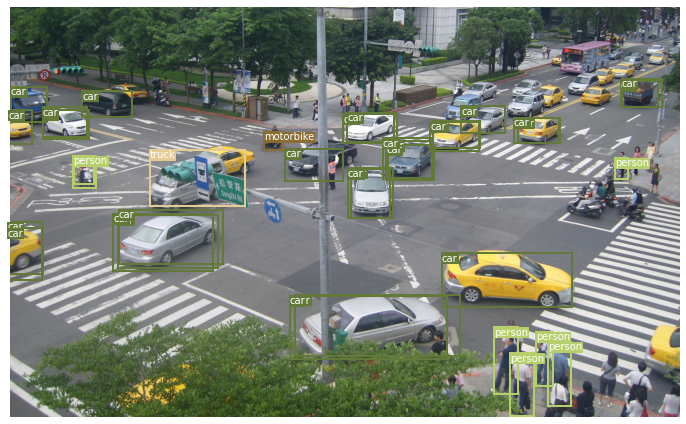

In [ ]:
# load image and get detections
#print(os.getcwd())
img_path = "./drive/My Drive/Lab_motion_tracking_exercise/images/Intersection-Counts.jpg"
prev_time = time.time()
img = Image.open(img_path)
detections = detect_image(img)
inference_time = datetime.timedelta(seconds=time.time() - prev_time)
print ('Inference Time: %s' % (inference_time))

# Get bounding-box colors
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

img = np.array(img)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
unpad_h = img_size - pad_y
unpad_w = img_size - pad_x

if detections is not None:
    unique_labels = detections[:, -1].cpu().unique()
    n_cls_preds = len(unique_labels)
    bbox_colors = random.sample(colors, n_cls_preds)
    # browse detections and draw bounding boxes
    for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections.cpu():
        box_h = ((y2 - y1) / unpad_h) * img.shape[0]
        box_w = ((x2 - x1) / unpad_w) * img.shape[1]
        y1 = ((y1 - pad_y // 2) / unpad_h) * img.shape[0]
        x1 = ((x1 - pad_x // 2) / unpad_w) * img.shape[1]
        color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
        bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(bbox)
        plt.text(x1, y1, s=classes[int(cls_pred)], color='white', verticalalignment='top',
                bbox={'color': color, 'pad': 0})
plt.axis('off')
# save image
# plt.savefig(img_path.replace(".jpg", "-det.jpg"), bbox_inches='tight', pad_inches=0.0)
plt.show()

### Εκτέλεση με τις αρχικές τιμές της εκφώνησης


In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output

videopath = './drive/My Drive/12.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                       # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

# initialize Sort object and video capture
from sort import *
vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 
frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)

#while(True):
for ii in range(40):
    ret, frame = vid.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pilimg = Image.fromarray(frame)
    detections = detect_image(pilimg)

    img = np.array(pilimg)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        print("ii", ii)
        print(detections.shape)
        tracked_objects = mot_tracker.update(detections.cpu())
        print(tracked_objects.shape)

        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
            box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
            box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
            y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
            x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

            color = colors[int(obj_id) % len(colors)]
            color = [i * 255 for i in color]
            cls = classes[int(cls_pred)]
            cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
            cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
            cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

    fig=figure(figsize=(12, 8))
    title("Video Stream")
    imshow(frame)
    show()
    #clear_output(wait=True)

### i) Μικρή τιμή του conf_thres (0.1 - 0.4), κρατώντας την τιμή του nms_thres=0.4

In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output

videopath = './drive/My Drive/12.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                       # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

# initialize Sort object and video capture
from sort import *
vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 
frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)

#while(True):
for ii in range(40):
    ret, frame = vid.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pilimg = Image.fromarray(frame)
    detections = detect_image(pilimg)

    img = np.array(pilimg)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        print("ii", ii)
        print(detections.shape)
        tracked_objects = mot_tracker.update(detections.cpu())
        print(tracked_objects.shape)

        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
            box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
            box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
            y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
            x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

            color = colors[int(obj_id) % len(colors)]
            color = [i * 255 for i in color]
            cls = classes[int(cls_pred)]
            cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
            cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
            cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

    fig=figure(figsize=(12, 8))
    title("Video Stream")
    imshow(frame)
    show()
    #clear_output(wait=True)

### ii) Μεγάλη τιμή του conf_thres (0.6 - 0.9), κρατώντας την τιμή του nms_thres=0.4

In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output

videopath = './drive/My Drive/12.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                       # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

# initialize Sort object and video capture
from sort import *
vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 
frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)

#while(True):
for ii in range(40):
    ret, frame = vid.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pilimg = Image.fromarray(frame)
    detections = detect_image(pilimg)

    img = np.array(pilimg)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        print("ii", ii)
        print(detections.shape)
        tracked_objects = mot_tracker.update(detections.cpu())
        print(tracked_objects.shape)

        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
            box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
            box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
            y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
            x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

            color = colors[int(obj_id) % len(colors)]
            color = [i * 255 for i in color]
            cls = classes[int(cls_pred)]
            cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
            cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
            cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

    fig=figure(figsize=(12, 8))
    title("Video Stream")
    imshow(frame)
    show()
    #clear_output(wait=True)

### iii) Μικρή τιμή του nms_thres (0.1 - 0.4), κρατώντας την τιμή του conf_thres=0.8


In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output

videopath = './drive/My Drive/12.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                       # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

# initialize Sort object and video capture
from sort import *
vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 
frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)

#while(True):
for ii in range(40):
    ret, frame = vid.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pilimg = Image.fromarray(frame)
    detections = detect_image(pilimg)

    img = np.array(pilimg)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        print("ii", ii)
        print(detections.shape)
        tracked_objects = mot_tracker.update(detections.cpu())
        print(tracked_objects.shape)

        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
            box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
            box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
            y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
            x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

            color = colors[int(obj_id) % len(colors)]
            color = [i * 255 for i in color]
            cls = classes[int(cls_pred)]
            cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
            cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
            cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

    fig=figure(figsize=(12, 8))
    title("Video Stream")
    imshow(frame)
    show()
    #clear_output(wait=True)

### iv) Μεγάλη τιμή του nms_thres (0.6 - 0.9), κρατώνταςτην τιμή του conf_thres=0.8


In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output

videopath = './drive/My Drive/12.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                       # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

# initialize Sort object and video capture
from sort import *
vid = cv2.VideoCapture(videopath)
mot_tracker = Sort() 
frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)

#while(True):
for ii in range(40):
    ret, frame = vid.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pilimg = Image.fromarray(frame)
    detections = detect_image(pilimg)

    img = np.array(pilimg)
    pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
    pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
    unpad_h = img_size - pad_y
    unpad_w = img_size - pad_x
    if detections is not None:
        print("ii", ii)
        print(detections.shape)
        tracked_objects = mot_tracker.update(detections.cpu())
        print(tracked_objects.shape)

        unique_labels = detections[:, -1].cpu().unique()
        n_cls_preds = len(unique_labels)
        for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
            box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
            box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
            y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
            x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

            color = colors[int(obj_id) % len(colors)]
            color = [i * 255 for i in color]
            cls = classes[int(cls_pred)]
            cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
            cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
            cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

    fig=figure(figsize=(12, 8))
    title("Video Stream")
    imshow(frame)
    show()
    #clear_output(wait=True)

## Σχόλια - Συμπεράσματα  


1. Conf_thres: Για μικρές τιμές του confidence threshold (κατώφλι εμπιστοσύνης), παρατήρουμε τα αντικείμενα που ανιχνεύονται είναι πολλά. Στο παράδειγμά μας πως εντοπίζονται πολλά αντικείμενα της κλάσης άτομα. Αντίθετα όταν μεγαλώνει το κατώφλι εμπιστοσύνης παρατηρούμε πως υπάρχουν πολλά αντικείμενα της κλάσης μας τα οποία ο αλγόριθμος αδυνατεί να ανιχνεύσει. 

2. Nms_thres: Για μεγάλες τιμές του Non-Maximum Suppression threshold παρατηρούμε πως τόσο τα αντικείμενα της κλάσης άτομα, όσο και τα αντικείμενα της κλάσης αυτοκίνητα, ανιχνεύονται από τον αλγόριθμο και δεύτερη φορά. Αντίθετα με μικρό nms_threshold ανιχνεύονται ακριβώς μια φορά.

Συμπερασματικά, για να επιτύχουμε την καλύτερη δυνατή ανίχνευση αντικειμένων και ταυτόχρονα να αποφύγουμε την πολλαπλή ανίχνευση των ίδιων αντικειμένων, θα ήταν προτιμητέο να επιλέξουμε έναν συνδυασμό μικρών τιμών και των δυο κατοφλιών. 